<a href="https://colab.research.google.com/github/abhilashkasap/LiDAR-Colab/blob/master/PointCloudProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q laspy

     |████████████████████████████████| 491kB 2.8MB/s 


In [ ]:
import laspy as lp
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.figure_factory as ff
from scipy.spatial import Delaunay

In [ ]:
inFile = lp.file.File("/content/drive/My Drive/lidar_raleigh_nc_spm_height_feet_las/newsample.las", mode = "r")

point_records = inFile.points

header = inFile.get_header()

#Some Basic Header statistics of data
print("Creation date \n :")
print(header.date)

print("Data Point Format used in creation LAS : ", header.data_format_id)

print("Data point Scale Factor : ", header.scale," Max of points : ", header.max, " Min of Points :", header.min)

Creation date 
 :
2013-08-23 00:00:00
Data Point Format used in creation LAS :  1
Data point Scale Factor :  [0.01, 0.01, 0.01]  Max of points :  [256999.99000000002, 4111999.99, 510.25]  Min of Points : [256000.0, 4111000.0, 384.66]


In [ ]:
# way to convert laspy to python dataframe
data = pd.DataFrame(point_records)
print(" Complete Data : \n")
point_records

 Complete Data : 



array([((156562, 262676, 11256, 15,  9, 2,  -3,   0,  4, 63501.94922959),),
       ((156494, 262677, 11251, 18,  9, 2,  -4,   0,  4, 63501.94923959),),
       ((156427, 262677, 11268, 18,  9, 2,  -4,   0,  4, 63501.94924959),),
       ...,
       (( 74934, 262712, 13151,  7, 73, 5, -17,  96, 29, 62336.555153  ),),
       (( 74851, 262710, 13202,  7, 73, 5, -16, 100, 29, 62336.555163  ),),
       (( 74783, 262711, 13204,  6, 81, 5, -16,  98, 29, 62336.555173  ),)],
      dtype=[('point', [('X', '<i4'), ('Y', '<i4'), ('Z', '<i4'), ('intensity', '<u2'), ('flag_byte', 'u1'), ('raw_classification', 'u1'), ('scan_angle_rank', 'i1'), ('user_data', 'u1'), ('pt_src_id', '<u2'), ('gps_time', '<f8')])])

In [ ]:
#small point list for further visualization
x_new = []
y_new = []
z_new = []
x_new = np.array(inFile.X/100) # converting them to np arrays
y_new = np.array(inFile.Y/100)
z_new = np.array(inFile.Z/100)
raw_class = np.array(inFile.raw_classification)
x_new.size

6609829

In [ ]:
def scaled(lst, mx , mn):
  scale_f = mx-mn
  for i in range(0,lst.size):
    lst[i] = float(lst[i]-mn)/scale_f
  return lst

x_scaled = scaled(x_new, x_new.max(),x_new.min())
y_scaled = scaled(y_new, y_new.max(), y_new.min())
z_scaled = scaled(z_new, z_new.max(), z_new.min())



In [ ]:
#scaling down the picture/ small part
x_small= []
y_small = []
z_small = []
for i in range(0,x_scaled.size):
  if(x_scaled[i]<=0.2 and y_scaled[i]<=0.2):
    x_small.append(x_scaled[i])
    y_small.append(y_scaled[i])
    z_small.append(z_scaled[i])


270629

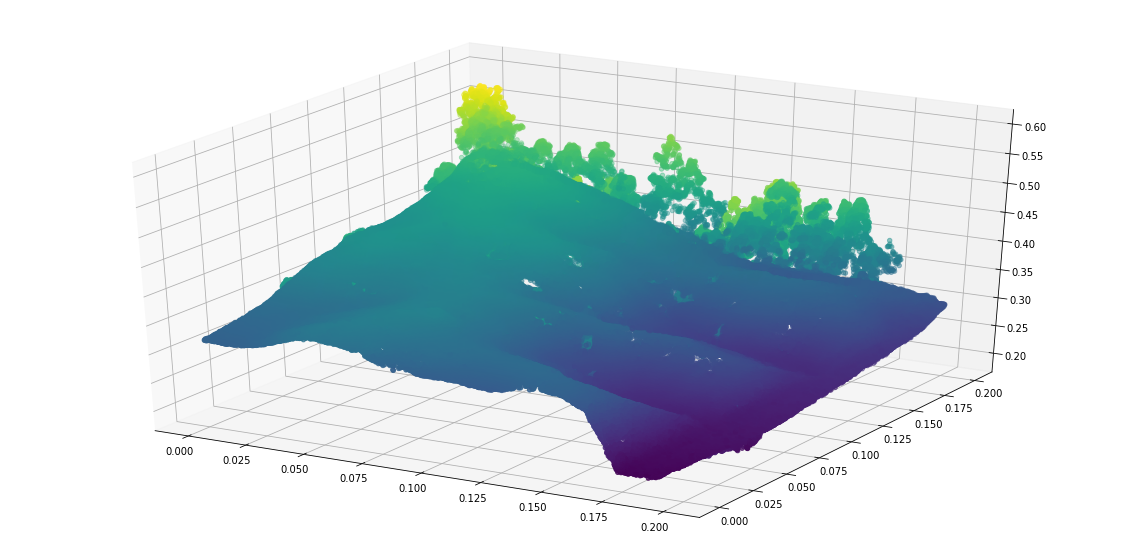

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.scatter3D(x_small, y_small, z_small, c=z_small)

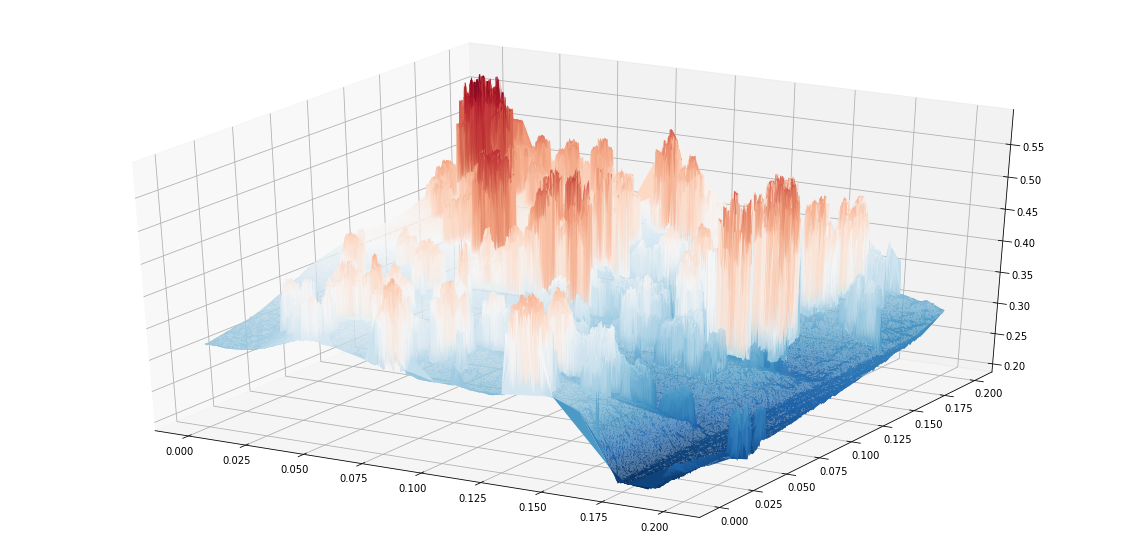

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x_small, y_small, z_small, cmap= 'RdBu_r')

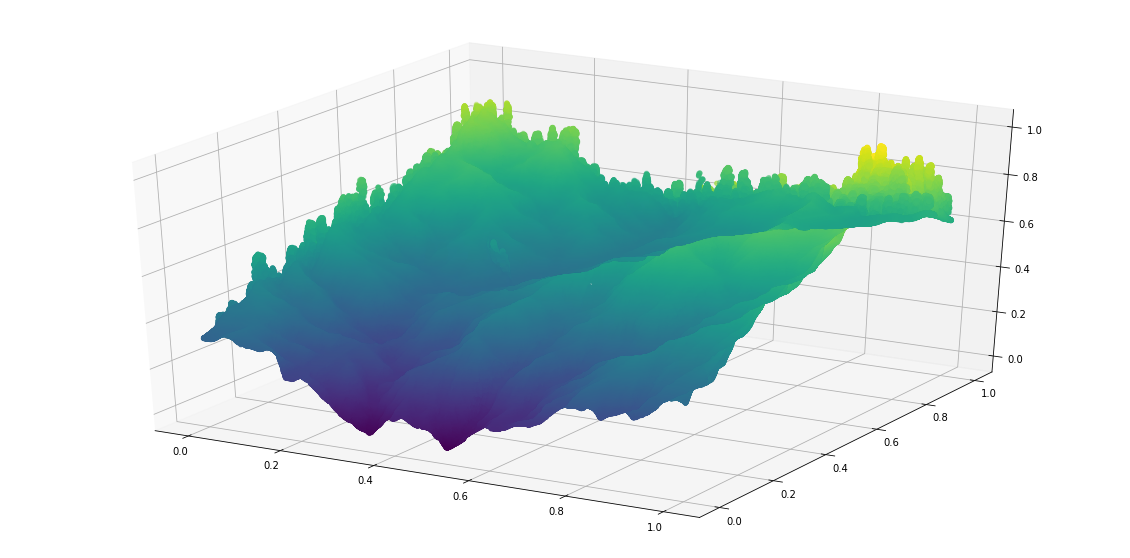

In [ ]:
# scatter plot using normalized values
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.scatter3D(x_scaled, y_scaled, z_scaled, c=z_scaled)


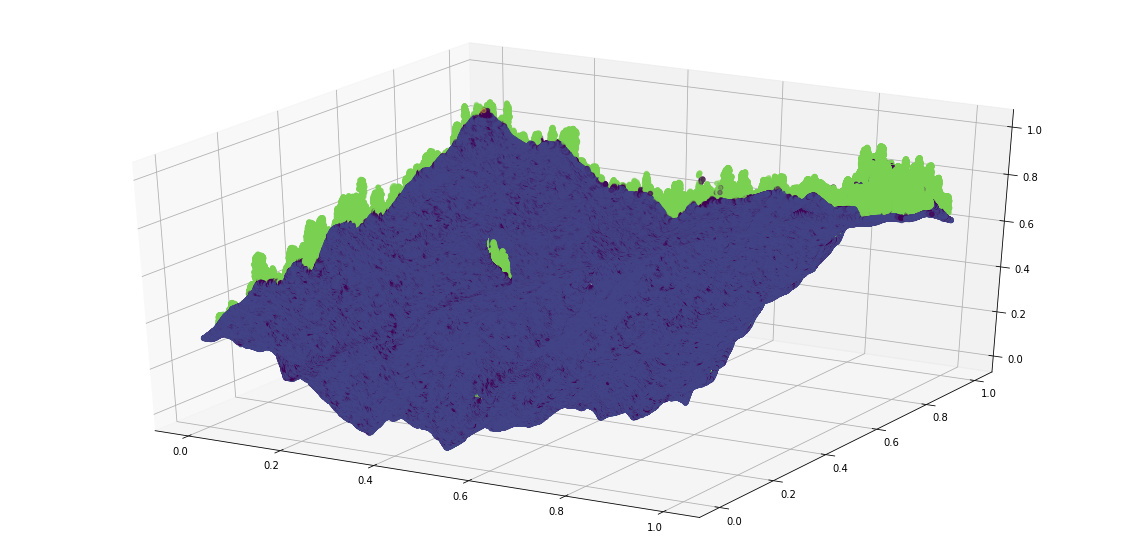

In [ ]:
#based on raw_classification
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.scatter3D(x_scaled, y_scaled, z_scaled, c=raw_class)

In [ ]:
#surface plot to the same data
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
ax.plot_trisurf(x_scaled, y_scaled, z_scaled, cmap= 'RdBu_r')

NameError: ignored

In [ ]:
#2d grayscale image based on z-value
img = np.zeros((500,500))  #creating a 500*500 grayscale image based on elevation
img2 = np.zeros((500,500))
def fill_8_neightbour(img, max_x, max_y,i,j,pix_val):
  if(i-1>=0 and j-1>=0):
    img[i-1][j-1] = pix_val
    img[i-1][j] = pix_val
    img[i][j-1] = pix_val
  if(i+1<=max_x and j+1<=max_y):
    img[i+1][j] = pix_val
    img[i+1][j+1] =pix_val
    img[i][j+1]= pix_val
  if(i-1>=0 and j+1<=max_y):
    img[i-1][j+1]=pix_val
  if(i+1<=max_x and j-1 >=0):
    img[i+1][j-1] = pix_val


for i in range(0,x_scaled.size):
  index1= int(x_scaled[i]*499)
  index2= int(y_scaled[i]*499)
  img[index1][index2] = z_scaled[i]*255
print(img)



[[ 81.23696154  81.35878653  81.68365316 ... 209.74201768 211.5490883
    0.        ]
 [ 81.37909069  81.44000318  81.82578231 ... 208.34103034 209.43745521
    0.        ]
 [ 81.46030735  81.25726571  81.84608647 ... 207.18369297 208.76741779
    0.        ]
 ...
 [ 91.20630623  92.9930727   93.46006848 ... 158.77856517 158.02731109
    0.        ]
 [ 90.0895772   91.67330201  93.09459352 ... 158.79886934 157.98670276
    0.        ]
 [  0.           0.          93.80523927 ...   0.           0.
    0.        ]]


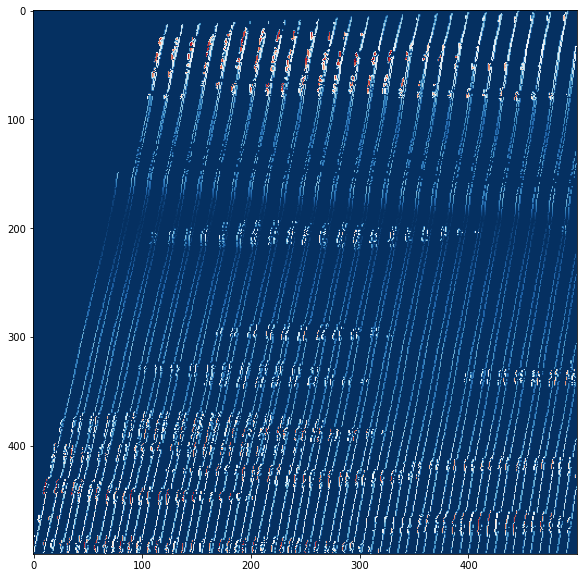

In [ ]:
fig = plt.figure(figsize=(20,10))
imgplot = plt.imshow(img, cmap='RdBu_r')

In [ ]:
#coloring 8th neighbourhood also
for i in range(0,x_scaled.size):
  index1= int(x_scaled[i]*499)
  index2= int(y_scaled[i]*499)
  img2[index1][index2] = z_scaled[i]*255
  fill_8_neightbour(img2,499,499,index1,index2,z_scaled[i]*255)
print(img2)


[[ 81.44000318  81.82578231  82.29277809 ... 209.43745521 211.5490883
  211.5490883 ]
 [ 81.44000318  81.82578231  82.29277809 ... 211.5490883  211.5490883
  211.5490883 ]
 [ 81.76486981  81.98821562  81.94760729 ... 209.43745521 209.43745521
  209.43745521]
 ...
 [ 91.20630623  90.0895772   93.33824349 ... 159.63134007 158.77856517
  157.98670276]
 [ 90.0895772   90.0895772   92.9930727  ... 159.14404013 158.77856517
  157.98670276]
 [ 90.0895772   90.0895772   91.67330201 ... 158.55521936 158.79886934
  157.98670276]]


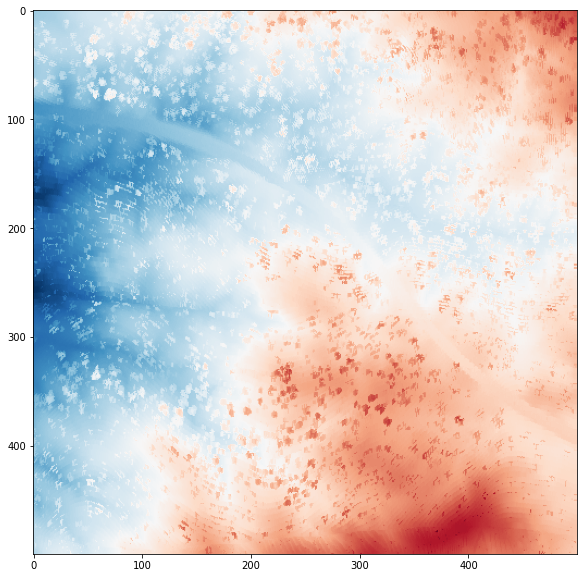

In [ ]:
fig = plt.figure(figsize=(20,10))
imgplot = plt.imshow(img2, cmap='RdBu_r')

In [ ]:
  fig = go.Figure(data=[go.Scatter3d(x=x_scaled, y=y_scaled, z=z_scaled,
                                   mode='markers', marker=dict(
        size=1,
                        # set color to an array/list of desired values
           # choose a colorscale
        opacity=0.8
    ))])
  
  fig.show()

In [ ]:
points2D = np.vstack([x_scaled,y_scaled]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x=x_scaled, y=y_scaled, z=z_scaled, simplices=simplices)
fig.show()

In [ ]:
!pip install pclpy_dependencies

ERROR: Could not find a version that satisfies the requirement pclpy_dependencies (from versions: none)
ERROR: No matching distribution found for pclpy_dependencies


In [ ]:
import pclpy
from pclpy import pcl

point_cloud = pclpy.read("/content/drive/My Drive/lidar_raleigh_nc_spm_height_feet_las/points.las", "PointXYZRGBA")
mls = pcl.surface.MovingLeastSquaresOMP.PointXYZRGBA_PointNormal()
tree = pcl.search.KdTree.PointXYZRGBA()
mls.setSearchRadius(0.05)
mls.setPolynomialFit(False)
mls.setNumberOfThreads(12)
mls.setInputCloud(point_cloud)
mls.setSearchMethod(tree)
mls.setComputeNormals(True)
output = pcl.PointCloud.PointNormal()
mls.process(output)

ModuleNotFoundError: ignored